##Encoder Model
###Implementation of paper "Photoshop 2.0:Generative Adversarial Networks for Photo Editing".

###Importing Dataset from Drive

In [ ]:
!unzip '/content/drive/My Drive/Colab Notebooks/GAN/Face Editing/Dataset/img_celeba.zip'

Streaming output truncated to the last 5000 lines.
  inflating: img_celeba/197600.jpg   
  inflating: img_celeba/197601.jpg   
  inflating: img_celeba/197602.jpg   
  inflating: img_celeba/197603.jpg   
  inflating: img_celeba/197604.jpg   
  inflating: img_celeba/197605.jpg   
  inflating: img_celeba/197606.jpg   
  inflating: img_celeba/197607.jpg   
  inflating: img_celeba/197608.jpg   
  inflating: img_celeba/197609.jpg   
  inflating: img_celeba/197610.jpg   
  inflating: img_celeba/197611.jpg   
  inflating: img_celeba/197612.jpg   
  inflating: img_celeba/197613.jpg   
  inflating: img_celeba/197614.jpg   
  inflating: img_celeba/197615.jpg   
  inflating: img_celeba/197616.jpg   
  inflating: img_celeba/197617.jpg   
  inflating: img_celeba/197618.jpg   
  inflating: img_celeba/197619.jpg   
  inflating: img_celeba/197620.jpg   
  inflating: img_celeba/197621.jpg   
  inflating: img_celeba/197622.jpg   
  inflating: img_celeba/197623.jpg   
  inflating: img_celeba/197624.jpg   

In [ ]:
!unzip '/content/drive/My Drive/Colab Notebooks/GAN/Face Editing/Dataset/img_celeba.zip' > /dev/null

replace img_celeba/000001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


###Importing Required Packages and Libraries

In [1]:
import numpy as np 
from glob import glob
import random
from PIL import Image 
import os 
import scipy.misc

In [ ]:
from keras.preprocessing.image import save_img
from keras.preprocessing.image import array_to_img

In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
print(tf.__version__)

2.4.1


##Class Definition of DeepConv Encoder 

Model of DeepConv Encoder as discussed in the original paper is given bellow

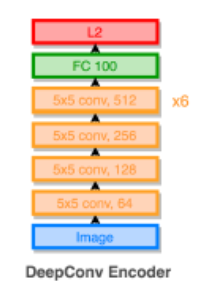

Model Architecture of DCGAN Generator is as shown below

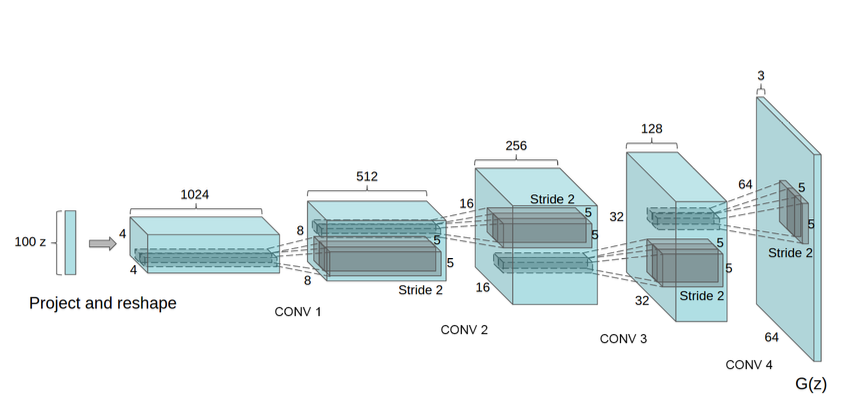

In [ ]:
class Encoder:
    
    def __init__(self, lr_rate_en, input_shape, z_dim, no_of_im, beta1=0.5, alpha=0.2):

        # Initialising the variables (Learning Rate, Input Shape of Image, Latent Space dimension of z-vector, Number of Images)
        self.lr_rate_en = tf.Variable(lr_rate_en, trainable=False, name="Encoder_lr")
        self.input_shape = input_shape
        self.z_dim = z_dim
        self.im_num = no_of_im

        # Intialising placeholder for input of Encoder
        self.input_images = tf.placeholder(dtype=tf.float32, shape=(None, input_shape[0], input_shape[1], input_shape[2]), name="input_encoder")

        # Calling the model_loss function
        self.en_loss, self.en_gen_img, self.en_logits = self.model_loss(self.input_images, self.z_dim, self.input_shape[2], self.im_num)

        # Calling the model_opti function
        self.en_opt = self.model_opti(self.en_loss, self.lr_rate_en, beta1)
        
    
    """
    Encoder: Function defining the Model of Encoder
    """ 

    def encoder(self, images, alpha=0.2, reuse=False):

        # Intialising the weights with mean = 0 and stddev = 0.02
        w_init = tf.random_normal_initializer(mean=0.0, stddev = 0.02)

        with tf.variable_scope("encoder", reuse=reuse):
            
           # Defining the first CONV layer : Number of Filters = 64, Kernel = 5x5, Stride = 2
           conv1 = tf.layers.conv2d(images, 64, 5, 2, padding='SAME', kernel_initializer=w_init)
           # Defining a Leaky ReLu layer as specified in Original Paper
           lrelu1 = tf.nn.leaky_relu(conv1, alpha=alpha)
           
           # Defining the second CONV layer : Number of Filters = 128, Kernel = 5x5, Stride = 2
           conv2 = tf.layers.conv2d(lrelu1, 128, 5, 2, padding='SAME',  kernel_initializer=w_init)
           bn_norm1 = tf.layers.batch_normalization(conv2, training=True)
           lrelu2 = tf.nn.leaky_relu(bn_norm1, alpha=alpha)
           
           # Defining the third CONV layer : Number of Filters = 256, Kernel = 5x5, Stride = 2
           conv3 = tf.layers.conv2d(lrelu2, 256, 5, 2, padding='SAME', kernel_initializer=w_init)
           bn_norm2 = tf.layers.batch_normalization(conv3, training=True)
           lrelu3 = tf.nn.leaky_relu(bn_norm2, alpha=alpha)
           
           # Defining the Six blocks of CONV layer : Number of Filters = 512, Kernel = 5x5, Stride = 2
           # First block
           conv4 = tf.layers.conv2d(lrelu3, 512, 5, 2, padding='SAME', kernel_initializer=w_init)
           bn_norm3 = tf.layers.batch_normalization(conv4, training=True)
           lrelu4 = tf.nn.leaky_relu(bn_norm3, alpha=alpha)
           
           # Second block
           conv5 = tf.layers.conv2d(lrelu4, 512, 5, 2, padding='SAME', kernel_initializer=w_init)
           bn_norm4 = tf.layers.batch_normalization(conv5, training=True)
           lrelu5 = tf.nn.leaky_relu(bn_norm4, alpha=alpha)
           
           # Third block
           conv6 = tf.layers.conv2d(lrelu5, 512, 5, 2, padding='SAME', kernel_initializer=w_init)
           bn_norm5 = tf.layers.batch_normalization(conv6, training=True)
           lrelu6 = tf.nn.leaky_relu(bn_norm5, alpha=alpha)
           
           # Fourth block
           conv7 = tf.layers.conv2d(lrelu6, 512, 5, 2, padding='SAME', kernel_initializer=w_init)
           bn_norm6 = tf.layers.batch_normalization(conv7, training=True)
           lrelu7 = tf.nn.leaky_relu(bn_norm6, alpha=alpha)
           
           # Five block
           conv8 = tf.layers.conv2d(lrelu7, 512, 5, 2, padding='SAME', kernel_initializer=w_init)
           bn_norm7 = tf.layers.batch_normalization(conv8, training=True)
           lrelu8 = tf.nn.leaky_relu(bn_norm7, alpha=alpha)
           
           # Sixth block
           conv9 = tf.layers.conv2d(lrelu8, 512, 5, 2, padding='SAME', kernel_initializer=w_init)
           
           flat = tf.reshape(conv9, (-1,512))
           
           # Applying a Dense layer of 100 nodes
           # here we are choosing 100 nodes for the dense layer because our z-vector dimension is 100 and 
           # output of Encoder will be fed as input to Generator
           logits = tf.layers.dense(flat, 100, kernel_initializer=w_init)
           
           return logits


    
    """
    Generator. Same as the generator of DCGAN. 
    """

    def generator(self, z, out_channel_dim, is_train=True):

        # Intialising the weights with mean = 0 and stddev = 0.02
        w_init = tf.random_normal_initializer(mean=0.0, stddev = 0.02)

        with tf.variable_scope('generator', reuse = False if is_train==True else True):
            
            # Defining the shape of z-vector (1x1x100)
            x1 = tf.reshape(z, (-1,1,1,100))
            
            # Adding the first Deconv layer 
            # 512 filters of 4x4 (kernel = 4) with stride = 1
            deconv1 = tf.layers.conv2d_transpose(x1, 512, 4, 1, padding='VALID', kernel_initializer=w_init)
            # Applying the Spatial Batch Normalisation layer
            bn_norm1 = tf.layers.batch_normalization(deconv1, training=is_train)
            # Applying the ReLu function
            relu1 = tf.nn.relu(bn_norm1)
            
            # Adding the second Deconv layer 
            # 256 filters of 4x4 (kernel = 4) with stride = 2
            deconv2 = tf.layers.conv2d_transpose(relu1, 256, 4, 2, padding='SAME', kernel_initializer=w_init)
            bn_norm2 = tf.layers.batch_normalization(deconv2, training=is_train)
            relu2 = tf.nn.relu(bn_norm2)
            
            # Adding the third Deconv layer 
            # 128 filters of 4x4 (kernel = 4) with stride = 2
            deconv3 = tf.layers.conv2d_transpose(relu2, 128, 4, 2, padding='SAME', kernel_initializer=w_init)
            bn_norm3 = tf.layers.batch_normalization(deconv3, training=is_train)
            relu3 = tf.nn.relu(bn_norm3)
            
            # Adding the fourth Deconv layer 
            # 64 filters of 4x4 (kernel = 4) with stride = 2
            deconv4 = tf.layers.conv2d_transpose(relu3, 64, 4, 2, padding='SAME', kernel_initializer=w_init)
            bn_norm4 = tf.layers.batch_normalization(deconv4, training=is_train)
            relu4 = tf.nn.relu(bn_norm4)
            
            # Adding the fifth Deconv layer 
            # output dimension filters of 4x4 (kernel = 4) with stride = 2
            deconv5 = tf.layers.conv2d_transpose(relu4, out_channel_dim, 4, 2, padding='SAME', kernel_initializer=w_init)
            
            logits = deconv5
            out = tf.tanh(deconv5, name="generator_out")
            
            return out, logits  


    
    """
    Function to calculate loss for the encoder. Calculates L2 Loss between generated images and input images.
    Returns the loss, generated image and the input image encoding. 
    """

    def model_loss(self, input_images, z_dim, out_channel_dim, im_num):

        # Calling Encoder fucntion
        en_logits = self.encoder(input_images)

        # Calling the Generator function
        # out_channel_dim = image_shape[2] means the channel of images
        gen_images,_ = self.generator(en_logits, out_channel_dim)

        gen_images = tf.reshape(gen_images, shape=(im_num, 64, 64, 3)) 

        # Calculating loss of Encoder
        # Here we are calculating L2 loss between input_image and gen_image
        en_loss = tf.reduce_mean(tf.reduce_sum(tf.reduce_sum(tf.reduce_sum(tf.squared_difference(input_images, gen_images), axis=3), axis=2), axis=1))

        return en_loss, gen_images, en_logits
    

    
    """
    Train the encoder using Adam Optimizer.
    """

    def model_opti(self, en_loss, lr_rate, beta1):
        
        train_vars = tf.trainable_variables()
        # Separating the Variables of Encoder
        en_vars = [var for var in train_vars if var.name.startswith('encoder')]
        
        # Optimize the parameters of encoder such that it reduces the encoder loss
        with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
            en_train_opt = tf.train.AdamOptimizer(lr_rate, beta1=beta1).minimize(en_loss, var_list = en_vars)
        
        # returning the optimized parameters
        return en_train_opt

##Training the Model

In [ ]:
"""
Function to get image from path and rescale it to [-1,1]
"""

def get_image_new(image_path, width, height):

    image = Image.open(image_path) 

    # crop image to reduce clutter 
    image = image.crop([30,40,168,178])

    # Resizing image to smaller size 
    # Image.BILINEAR is for 2x2 linear interpolation
    image = image.resize([width, height], Image.BILINEAR)

    # Normalisation steps
    image = np.array(image, dtype=np.float32)
    image = np.divide(image, 255)
    image = np.subtract(image, 0.5)

    #scaling image to [-1,1]
    image = np.multiply(image, 2)   

    return image

Train Encoder while we will use the same trained parameters of DCGAN generator

In [ ]:
"""
Train Encoder. Uses trained Generator of DCGAN model. 
"""

def train(en_net, max_iter, batch_size, data_files, dcgan_model_dir, encoder_dir, lr_rate, beta1, shape, z_dim, en_losses):

    saver = tf.train.Saver(max_to_keep=None)

    random.shuffle(data_files)

    # this is for calculating total images required for making perfect batches from dataset
    max_bs_len = int(len(data_files)/batch_size)*batch_size
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        train_vars = tf.trainable_variables()
        # Separating the Generator variables
        gen_vars = [var for var in train_vars if var.name.startswith('generator')]

        # Loading the Model of DCGAN which is trained
        saver2 = tf.train.Saver(var_list=gen_vars)
        saver2.restore(sess, dcgan_model_dir)  
        
        epoch = 0

        while epoch < (max_iter):
            bs = 0
            step = 0

            while bs < max_bs_len:
                # making batch of images
                batch_files = data_files[bs:(bs+batch_size)]
                # converting images to NumPy array using function get_image_new
                batch_images = np.array([get_image_new(sample_file, 64, 64) for sample_file in batch_files]).astype(np.float32) 
                
                # feed batch_images as input_images to Encoder
                # and update the optimized parameters of Encoder
                sess.run(en_net.en_opt, feed_dict={en_net.input_images:batch_images})
                             
                if step % 100 == 0:
                    train_en_loss= sess.run([en_net.en_loss], feed_dict={en_net.input_images:batch_images})
                    print ("Epoch = %r, Step = %r, en_loss = %r " % (epoch, step, train_en_loss))
                    en_losses.append(train_en_loss)

                bs = bs + batch_size
                step = step +1 
            
            if (epoch % 4 == 0):
                dir_path =  encoder_dir + "try_epoch_" + str(epoch) + "/" 
                saver.save(sess, dir_path, write_meta_graph=True)
                print ("\n\n### Model Weights Saved Epoch = %r  ###\n\n" %(epoch))

            epoch = epoch + 1

    return en_losses

In [ ]:
data_path = '/content/img_celeba/' 
input_fname_pattern = "*.jpg"
encoder_dir = '/content/drive/My Drive/Colab Notebooks/GAN/Face Editing/Encoder_saved_model/' 
dcgan_model_dir = '/content/drive/My Drive/Colab Notebooks/GAN/Face Editing/DCGAN_saved_models/try_epoch_24/'

In [ ]:
batch_size = 64
z_dim = 100
lr_rate = 0.0002
beta1 = 0.5
alpha = 0.2
max_iter = 25

#CelebA Face Database 
data_files = glob(data_path+input_fname_pattern)

# Storing Losses
en_losses = []

shape = 64,64,3

tf.reset_default_graph()

print(len(data_files))

202599


In [ ]:
en_net = Encoder(lr_rate, shape, z_dim, batch_size, beta1, alpha)

train(en_net, max_iter, batch_size, data_files, dcgan_model_dir, encoder_dir, lr_rate, beta1, shape, z_dim, en_losses)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/legacy_tf_layers/convolutional.py:414: UserWarning: `tf.layers.conv2d` is deprecated and will be removed in a future version. Please Use `tf.keras.layers.Conv2D` instead.
  warnings.warn('`tf.layers.conv2d` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer_v1.py:1719: UserWarning: `layer.apply` is deprecated and will be removed in a future version. Please use `layer.__call__` method instead.
  warnings.warn('`layer.apply` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/legacy_tf_layers/normalization.py:308: UserWarning: `tf.layers.batch_normalization` is deprecated and will be removed in a future version. Please use `tf.keras.layers.BatchNormalization` instead. In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.BatchNormalization` documentation).
  '`tf.layers.batch_normalizat

INFO:tensorflow:Restoring parameters from /content/drive/My Drive/Colab Notebooks/GAN/Face Editing/DCGAN_saved_models/try_epoch_24/
Epoch = 0, Step = 0, en_loss = [2818.0884] 
Epoch = 0, Step = 100, en_loss = [1114.559] 
Epoch = 0, Step = 200, en_loss = [1050.196] 
Epoch = 0, Step = 300, en_loss = [941.9098] 
Epoch = 0, Step = 400, en_loss = [860.51917] 
Epoch = 0, Step = 500, en_loss = [819.8147] 
Epoch = 0, Step = 600, en_loss = [848.8633] 
Epoch = 0, Step = 700, en_loss = [761.6742] 
Epoch = 0, Step = 800, en_loss = [858.1255] 
Epoch = 0, Step = 900, en_loss = [762.25037] 
Epoch = 0, Step = 1000, en_loss = [726.1117] 
Epoch = 0, Step = 1100, en_loss = [702.8518] 
Epoch = 0, Step = 1200, en_loss = [726.4762] 
Epoch = 0, Step = 1300, en_loss = [703.38007] 
Epoch = 0, Step = 1400, en_loss = [740.1039] 
Epoch = 0, Step = 1500, en_loss = [718.59296] 
Epoch = 0, Step = 1600, en_loss = [695.9903] 
Epoch = 0, Step = 1700, en_loss = [717.5598] 
Epoch = 0, Step = 1800, en_loss = [726.07367] 


[[2818.0884],
 [1114.559],
 [1050.196],
 [941.9098],
 [860.51917],
 [819.8147],
 [848.8633],
 [761.6742],
 [858.1255],
 [762.25037],
 [726.1117],
 [702.8518],
 [726.4762],
 [703.38007],
 [740.1039],
 [718.59296],
 [695.9903],
 [717.5598],
 [726.07367],
 [690.1147],
 [660.8379],
 [699.5447],
 [726.5718],
 [616.9143],
 [635.9021],
 [690.2987],
 [641.3948],
 [620.15393],
 [586.27234],
 [638.96484],
 [639.5228],
 [613.6203],
 [696.29297],
 [692.32043],
 [693.9132],
 [678.91406],
 [664.6948],
 [631.9601],
 [696.3127],
 [623.3233],
 [720.3577],
 [659.3436],
 [613.49634],
 [606.9562],
 [633.5602],
 [630.8757],
 [640.0298],
 [643.63525],
 [625.3048],
 [650.9808],
 [644.0416],
 [623.3214],
 [592.76776],
 [649.1749],
 [658.93036],
 [564.1804],
 [580.6114],
 [636.3129],
 [589.6504],
 [576.80554],
 [541.08276],
 [596.80334],
 [597.3696],
 [563.77405],
 [648.0137],
 [638.16034],
 [655.17914],
 [639.49896],
 [612.1717],
 [596.5837],
 [672.7705],
 [593.3468],
 [677.1997],
 [616.4532],
 [579.4309],
 [

In [2]:
en_losses = [[2818.0884],
 [1114.559],
 [1050.196],
 [941.9098],
 [860.51917],
 [819.8147],
 [848.8633],
 [761.6742],
 [858.1255],
 [762.25037],
 [726.1117],
 [702.8518],
 [726.4762],
 [703.38007],
 [740.1039],
 [718.59296],
 [695.9903],
 [717.5598],
 [726.07367],
 [690.1147],
 [660.8379],
 [699.5447],
 [726.5718],
 [616.9143],
 [635.9021],
 [690.2987],
 [641.3948],
 [620.15393],
 [586.27234],
 [638.96484],
 [639.5228],
 [613.6203],
 [696.29297],
 [692.32043],
 [693.9132],
 [678.91406],
 [664.6948],
 [631.9601],
 [696.3127],
 [623.3233],
 [720.3577],
 [659.3436],
 [613.49634],
 [606.9562],
 [633.5602],
 [630.8757],
 [640.0298],
 [643.63525],
 [625.3048],
 [650.9808],
 [644.0416],
 [623.3214],
 [592.76776],
 [649.1749],
 [658.93036],
 [564.1804],
 [580.6114],
 [636.3129],
 [589.6504],
 [576.80554],
 [541.08276],
 [596.80334],
 [597.3696],
 [563.77405],
 [648.0137],
 [638.16034],
 [655.17914],
 [639.49896],
 [612.1717],
 [596.5837],
 [672.7705],
 [593.3468],
 [677.1997],
 [616.4532],
 [579.4309],
 [577.7947],
 [603.71643],
 [593.64233],
 [602.78455],
 [609.6674],
 [598.74695],
 [614.4412],
 [606.5684],
 [592.34863],
 [564.7401],
 [650.4079],
 [628.97473],
 [535.9988],
 [557.76086],
 [612.20685],
 [562.1942],
 [563.70026],
 [519.56104],
 [568.81665],
 [569.1068],
 [532.53296],
 [617.1467],
 [618.50305],
 [627.21216],
 [618.954],
 [591.9281],
 [573.34644],
 [627.1206],
 [569.98413],
 [660.1769],
 [598.7051],
 [553.48566],
 [556.42944],
 [576.6583],
 [561.1522],
 [580.5985],
 [591.4366],
 [577.86926],
 [590.06067],
 [583.38007],
 [577.6183],
 [546.56573],
 [592.2283],
 [613.00684],
 [519.80725],
 [541.2346],
 [583.6422],
 [538.40076],
 [553.7479],
 [513.9525],
 [559.8323],
 [555.2196],
 [518.6688],
 [599.99084],
 [593.0907],
 [597.9965],
 [602.7706],
 [577.5542],
 [557.72205],
 [607.20996],
 [554.22327],
 [646.2108],
 [582.60596],
 [529.2388],
 [542.4915],
 [557.865],
 [545.40125],
 [569.54944],
 [573.8673],
 [562.0073],
 [574.51666],
 [568.0602],
 [566.5419],
 [532.3278],
 [595.8658],
 [601.109],
 [505.55853],
 [529.88947],
 [570.2349],
 [520.58716],
 [525.3561],
 [498.94647],
 [541.9451],
 [539.5309],
 [502.65955],
 [583.8582],
 [580.2031],
 [598.5963],
 [587.4242],
 [563.0585],
 [546.8855],
 [592.1212],
 [536.5113],
 [637.7235],
 [564.79944],
 [520.73486],
 [529.0203],
 [554.9271],
 [534.63806],
 [554.6095],
 [563.6638],
 [550.89075],
 [561.64075],
 [551.3964],
 [553.9784],
 [524.7269],
 [562.92255],
 [589.9471],
 [501.20428],
 [515.4706],
 [562.09576],
 [510.24026],
 [512.66876],
 [488.12317],
 [531.781],
 [532.7106],
 [493.35358],
 [565.2716],
 [564.40424],
 [572.2804],
 [575.6631],
 [554.37726],
 [536.06726],
 [581.56433],
 [530.34875],
 [619.0925],
 [553.54297],
 [514.70276],
 [521.67566],
 [539.16833],
 [518.6752],
 [548.52606],
 [549.192],
 [538.86536],
 [553.9542],
 [540.43945],
 [542.69],
 [517.014],
 [551.30725],
 [578.56287],
 [491.31293],
 [508.38538],
 [554.16943],
 [500.51007],
 [504.91083],
 [478.92584],
 [522.035],
 [519.5604],
 [486.8752],
 [553.923],
 [554.0669],
 [562.54205],
 [570.24384],
 [544.7662],
 [529.36835],
 [569.9],
 [518.6885],
 [614.54803],
 [546.6959],
 [508.4873],
 [518.13525],
 [524.0278],
 [513.6555],
 [537.5145],
 [541.28613],
 [531.29407],
 [541.7582],
 [540.4689],
 [532.48395],
 [509.92477],
 [566.71814],
 [574.8753],
 [486.56738],
 [503.12344],
 [543.5824],
 [496.99152],
 [497.76697],
 [474.14304],
 [517.04065],
 [518.06964],
 [480.8181],
 [550.46606],
 [546.8625],
 [555.38],
 [560.02246],
 [539.5984],
 [522.75256],
 [566.6437],
 [511.426],
 [599.86194],
 [539.39026],
 [496.92422],
 [511.81976],
 [541.9889],
 [503.7555],
 [530.01013],
 [535.6576],
 [526.5373],
 [535.37463],
 [530.7335],
 [525.2211],
 [505.11575],
 [532.3395],
 [565.44336],
 [476.61066],
 [494.3432],
 [540.9493],
 [484.35974],
 [491.82785],
 [462.29434],
 [512.42236],
 [511.2016],
 [475.69394],
 [540.8611],
 [539.1869],
 [551.1915],
 [555.2655],
 [532.5076],
 [513.199],
 [561.9381],
 [504.56113],
 [591.30225],
 [534.17053],
 [491.94107],
 [503.08075],
 [517.9478],
 [497.2129],
 [526.0613],
 [527.48663],
 [522.82294],
 [533.2163],
 [523.16846],
 [521.46204],
 [495.97327],
 [526.36456],
 [560.3364],
 [476.44647],
 [490.92755],
 [533.06494],
 [478.15494],
 [503.2705],
 [462.6919],
 [504.162],
 [507.21036],
 [473.07635],
 [536.77374],
 [531.3251],
 [540.2095],
 [548.6343],
 [528.1194],
 [513.84485],
 [553.9404],
 [503.59357],
 [584.82056],
 [526.20654],
 [488.2865],
 [507.4104],
 [513.2286],
 [490.922],
 [519.1073],
 [526.969],
 [514.49774],
 [529.3711],
 [517.945],
 [515.6525],
 [491.92432],
 [519.4202],
 [553.859],
 [469.18076],
 [487.16977],
 [527.55994],
 [472.98932],
 [495.15125],
 [460.78525],
 [498.12463],
 [500.85904],
 [467.1402],
 [531.68726],
 [526.37585],
 [531.06006],
 [543.5818],
 [522.5128],
 [507.0536],
 [542.7588],
 [502.13138],
 [585.23883],
 [523.85],
 [476.73785],
 [495.3575],
 [510.80106],
 [487.7796],
 [514.92523],
 [517.5209],
 [515.4142],
 [523.22736],
 [507.80667],
 [508.5878],
 [483.48718],
 [513.46643],
 [548.7379],
 [472.47516],
 [476.19803],
 [521.8367],
 [468.81616],
 [474.28912],
 [457.83636],
 [493.9309],
 [496.36447],
 [461.10535],
 [527.4541],
 [523.16565],
 [527.9861],
 [537.75134],
 [516.16675],
 [503.36047],
 [548.78326],
 [501.29996],
 [581.04266],
 [523.89825],
 [476.3067],
 [490.9671],
 [496.6413],
 [484.3799],
 [508.41708],
 [515.1063],
 [503.8916],
 [518.09265],
 [505.56714],
 [503.83478],
 [478.88092],
 [512.2607],
 [539.17523],
 [467.81335],
 [474.0547],
 [516.34143],
 [464.99237],
 [472.33676],
 [448.70355],
 [496.21442],
 [492.04895],
 [458.99768],
 [523.3537],
 [519.7595],
 [523.29553],
 [536.79816],
 [513.8932],
 [494.95694],
 [534.58307],
 [494.97174],
 [571.42474],
 [514.60315],
 [478.8047],
 [485.5583],
 [492.5442],
 [479.57526],
 [504.01178],
 [506.5518],
 [509.17584],
 [520.4675],
 [504.92474],
 [500.98822],
 [478.75937],
 [504.57227],
 [535.22797],
 [461.97943],
 [470.2173],
 [512.34546],
 [458.45813],
 [495.36896],
 [443.37323],
 [486.72034],
 [486.6462],
 [454.1343],
 [517.18713],
 [516.8965],
 [512.89],
 [528.0165],
 [506.99084],
 [502.4364],
 [528.78625],
 [489.54535],
 [567.9342],
 [513.8958],
 [466.58133],
 [485.9073],
 [490.49005],
 [471.14032],
 [502.9264],
 [502.51428],
 [501.55728],
 [508.5874],
 [495.82224],
 [496.21454],
 [475.17358],
 [496.7246],
 [529.98193],
 [458.17682],
 [467.2254],
 [504.91602],
 [456.2531],
 [471.7401],
 [435.95676],
 [483.6532],
 [481.51013],
 [449.30695],
 [513.1952],
 [513.53046],
 [508.5514],
 [526.07263],
 [508.40292],
 [487.3083],
 [527.59094],
 [481.21222],
 [561.4164],
 [505.65115],
 [464.2993],
 [479.45844],
 [490.00845],
 [469.03268],
 [498.71527],
 [501.9985],
 [498.2589],
 [504.45422],
 [496.4289],
 [493.3703],
 [468.40048],
 [493.32788],
 [529.4694],
 [454.2746],
 [462.7206],
 [501.6999],
 [453.6798],
 [461.9596],
 [433.9173],
 [480.2435],
 [478.60962],
 [449.55414],
 [508.07782],
 [510.66003],
 [506.83945],
 [529.4605],
 [497.92114],
 [486.99194],
 [528.30164],
 [480.46832],
 [565.37537],
 [507.38126],
 [467.5808],
 [476.801],
 [491.7591],
 [464.87323],
 [494.1579],
 [497.36533],
 [496.08948],
 [503.8783],
 [497.02576],
 [489.93762],
 [465.08942],
 [488.7093],
 [521.541],
 [452.01526],
 [459.48444],
 [498.36966],
 [452.21103],
 [479.64948],
 [432.82843],
 [481.46338],
 [473.03693],
 [443.65848],
 [504.01343],
 [506.45322],
 [499.69455],
 [518.8518],
 [497.66705],
 [483.77502],
 [526.33325],
 [476.47046],
 [558.01373],
 [501.5584],
 [460.55472],
 [471.59882],
 [482.61313],
 [461.8837],
 [492.46652],
 [492.25702],
 [492.9306],
 [496.29803],
 [489.7128],
 [487.83942],
 [468.16992],
 [486.38614],
 [518.3721],
 [447.08594],
 [455.66632],
 [495.30405],
 [446.67206],
 [458.9751],
 [427.10614],
 [476.5542],
 [471.3437],
 [444.06918],
 [505.6284],
 [502.82486],
 [498.2802],
 [516.47797],
 [494.63214],
 [480.5719],
 [516.8092],
 [474.88907],
 [557.9054],
 [495.9522],
 [452.3463],
 [467.92603],
 [475.4328],
 [456.56598],
 [489.69183],
 [489.19757],
 [489.50836],
 [491.5328],
 [487.82892],
 [482.26453],
 [460.9794],
 [485.0345],
 [514.99896],
 [443.93616],
 [452.2348],
 [487.8848],
 [444.41907],
 [453.21414],
 [427.85373],
 [469.43622],
 [468.38788],
 [441.42902],
 [496.6718],
 [500.19528],
 [494.2104],
 [513.7727],
 [493.25745],
 [477.05975],
 [511.31036],
 [468.34338],
 [550.985],
 [494.8001],
 [453.95483],
 [470.91452],
 [481.0531],
 [456.62695],
 [488.5138],
 [485.12994],
 [480.0875],
 [488.46564],
 [485.5219],
 [480.31677],
 [459.9427],
 [485.21002],
 [507.77682],
 [438.44446],
 [452.16138],
 [489.2964],
 [442.1911],
 [453.24994],
 [424.4417],
 [467.41614],
 [465.76398],
 [440.3756],
 [496.41992],
 [495.56915],
 [491.07764],
 [512.93274],
 [487.15958],
 [476.08734],
 [507.22366],
 [472.0893],
 [542.5056],
 [490.4527],
 [448.422],
 [465.20618],
 [470.64212],
 [453.54828],
 [483.58548],
 [484.07755],
 [476.6375],
 [488.14478],
 [485.80725],
 [474.7821],
 [455.92505],
 [480.2134],
 [505.04468],
 [437.259],
 [448.1281],
 [488.73727],
 [441.0678],
 [459.37573],
 [418.9857],
 [464.40002],
 [464.473],
 [434.1234],
 [491.74475],
 [501.93787],
 [490.67517],
 [506.1123],
 [485.617],
 [474.65753],
 [506.3388],
 [467.04492],
 [542.88684],
 [488.84058],
 [449.5769],
 [461.80075],
 [478.62653],
 [450.8267],
 [479.66852],
 [479.06927],
 [477.50574],
 [486.59604],
 [479.35004],
 [475.39536],
 [453.3211],
 [477.42374],
 [503.79724],
 [434.31824],
 [446.95587],
 [484.5365],
 [437.2523],
 [453.69107],
 [420.5053],
 [463.57742],
 [460.92752],
 [433.87967],
 [490.75974],
 [494.8037],
 [490.34937],
 [505.90067],
 [481.1871],
 [472.95874],
 [504.29712],
 [459.4979],
 [540.002],
 [483.30276],
 [452.534],
 [462.52774],
 [471.599],
 [448.26276],
 [477.9279],
 [476.43512],
 [473.95502],
 [485.5276],
 [472.802],
 [473.5821],
 [451.99326],
 [470.56668],
 [503.20325],
 [442.55356],
 [444.9656],
 [484.3313],
 [434.55475],
 [445.2013],
 [420.28925],
 [461.01007],
 [458.0951],
 [428.36823],
 [488.9852],
 [489.2353],
 [485.24487],
 [503.22226],
 [478.92096],
 [475.11145],
 [504.85107],
 [461.11002],
 [534.75073],
 [483.816],
 [445.99738],
 [456.89706],
 [469.3994],
 [445.08325],
 [472.9246],
 [475.02112],
 [475.27972],
 [483.86594],
 [471.53647],
 [471.76468],
 [449.34995],
 [469.41324],
 [496.66638],
 [430.77997],
 [443.37427],
 [480.63904],
 [431.82153],
 [453.2999],
 [415.25043],
 [458.29388],
 [455.3918],
 [427.89545],
 [488.55225],
 [488.47717],
 [479.59537],
 [496.28528],
 [477.45905],
 [466.43112],
 [494.35205],
 [459.49054],
 [530.351],
 [479.74377],
 [442.94254],
 [458.75476],
 [466.47723],
 [443.44214],
 [472.35898],
 [473.08044],
 [469.27167],
 [476.4924],
 [469.3759],
 [464.2738],
 [448.9856],
 [468.20667],
 [498.22775],
 [430.70514],
 [436.2549],
 [474.81232],
 [430.49014],
 [438.0252],
 [412.24777],
 [455.59277],
 [454.65384],
 [423.849]]

In [3]:
len(en_losses)

800

In [4]:
from matplotlib import pyplot

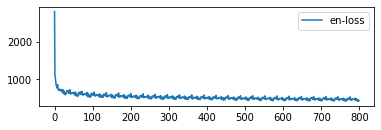

In [7]:
pyplot.subplot(2, 1, 1)
pyplot.plot(en_losses, label='en-loss')
pyplot.legend()